# Assignment 4

# Table of contents
1. [Introduction](#introduction)

2. [Examine and explore data (visualization, interactions among features)](#question1)

3. [Apply the model for prediction with holdout and cross validation](#question2)

4. [Using PCA, apply the model with holdout and cross validation](#question3)

5. [Visualize the residue and homoscedasticity](#question4)

6. [Tune the model if necessary](#question5)

7. [Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, 
etc.)](#question6)

8. [Include conclusions for summary](#question7)

## 1. Introduction <a name="introduction"></a>
This project use dataset from https://www.kaggle.com/anthonypino/melbourne-housing-market to create a linear regression model to predict a house's value. The project will answer 7 following questions which are also guideline for building a model.
1. Examine and explore data (visualization, interactions among features)
2. Apply the model for prediction with holdout and cross validation
3. Using PCA, apply the model with holdout and cross validation
4. Visualize the residue and homoscedasticity
5. Tune the model if necessary
6. Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, etc.)
7. Include conclusions for summary

## 2. Examine and explore data (visualization, interactions among features)<a name="dataset"></a>

#### Import Python libraries<a name="library"></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

#### Import data<a name="data"></a>

In [2]:
url = "D:\Hoang\SauDaiHoc\Python\CBD Robotics\Assignment 4\Melbourne_housing_FULL.csv"
data = pd.read_csv(url)

#### Data description<a name="description"></a>

In [3]:
# Number of rows and columns
print("Shape of dataframe is: {}".format(data.shape))

Shape of dataframe is: (34857, 21)


In [4]:
# Dataset columns
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
# View first few records
pd.set_option('display.max_columns', None)  
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
# Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [7]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

#### Remove missing data above 50%

In [9]:
# To remove an entire column
#data1 = data.drop('BuildingArea','YearBuilt')
data1= data.drop(['BuildingArea','YearBuilt'], axis=1)
# Remove rows missing data
data1 = data1.dropna()

# Confirm that observations missing data were removed  
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17679 entries, 1 to 34856
Data columns (total 19 columns):
Suburb           17679 non-null object
Address          17679 non-null object
Rooms            17679 non-null int64
Type             17679 non-null object
Price            17679 non-null float64
Method           17679 non-null object
SellerG          17679 non-null object
Date             17679 non-null object
Distance         17679 non-null float64
Postcode         17679 non-null float64
Bedroom2         17679 non-null float64
Bathroom         17679 non-null float64
Car              17679 non-null float64
Landsize         17679 non-null float64
CouncilArea      17679 non-null object
Lattitude        17679 non-null float64
Longtitude       17679 non-null float64
Regionname       17679 non-null object
Propertycount    17679 non-null float64
dtypes: float64(10), int64(1), object(8)
memory usage: 2.7+ MB


In [10]:
data1.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [11]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,17679.0,3.053849e+00,0.944396,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,17679.0,1.094974e+06,655981.504660,85000.00000,660000.00000,912500.0000,1.345000e+06,1.120000e+07
Distance,17679.0,1.115311e+01,6.643855,0.00000,6.50000,10.4000,1.390000e+01,4.810000e+01
Postcode,17679.0,3.111932e+03,109.451667,3000.00000,3046.00000,3085.0000,3.150000e+03,3.977000e+03
Bedroom2,17679.0,3.036541e+00,0.956882,0.00000,2.00000,3.0000,4.000000e+00,2.000000e+01
Bathroom,17679.0,1.584422e+00,0.704733,0.00000,1.00000,1.0000,2.000000e+00,9.000000e+00
Car,17679.0,1.698739e+00,0.999023,0.00000,1.00000,2.0000,2.000000e+00,1.800000e+01
Landsize,17679.0,5.948663e+02,3786.375295,0.00000,222.50000,517.0000,6.640000e+02,4.330140e+05
Lattitude,17679.0,-3.780651e+01,0.089326,-38.19043,-37.85926,-37.7998,-3.774960e+01,-3.739946e+01
Longtitude,17679.0,1.449963e+02,0.116925,144.42379,144.92529,145.0027,1.450673e+02,1.455264e+02


In [12]:
# Identify object columns
print(data1.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [13]:
# Convert to date object
data1['Date'] = pd.to_datetime(data['Date'])

#### Convert objects to categorical variables

In [14]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    data1[colname] = data1[colname].astype('category')

In [15]:
# Convert numeric variables to categorical
num_cats = ['Postcode']  

for colname in num_cats:
    data1[colname] = data1[colname].astype('category')   

# Confirm changes

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17679 entries, 1 to 34856
Data columns (total 19 columns):
Suburb           17679 non-null category
Address          17679 non-null category
Rooms            17679 non-null int64
Type             17679 non-null category
Price            17679 non-null float64
Method           17679 non-null category
SellerG          17679 non-null category
Date             17679 non-null datetime64[ns]
Distance         17679 non-null float64
Postcode         17679 non-null category
Bedroom2         17679 non-null float64
Bathroom         17679 non-null float64
Car              17679 non-null float64
Landsize         17679 non-null float64
CouncilArea      17679 non-null category
Lattitude        17679 non-null float64
Longtitude       17679 non-null float64
Regionname       17679 non-null category
Propertycount    17679 non-null float64
dtypes: category(8), datetime64[ns](1), float64(9), int64(1)
memory usage: 2.6 MB


### Visualization

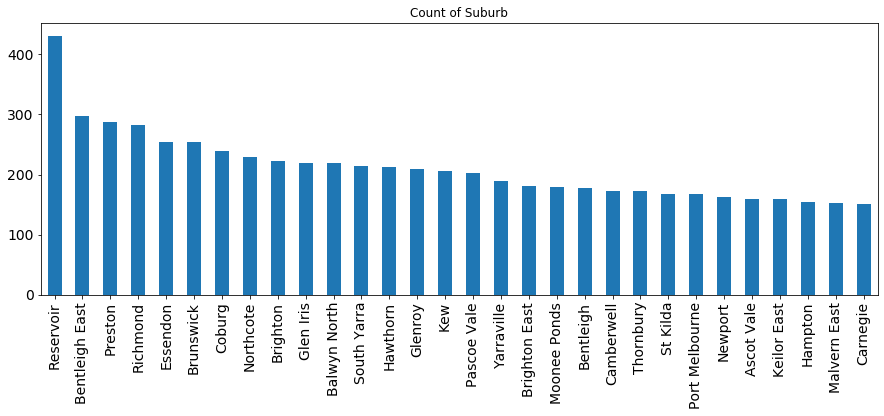

In [16]:
# Count of Suburb
data1['Suburb'].value_counts().head(30).plot.bar(figsize = (15,5),fontsize = 14,title = "Count of Suburb")
#data['Suburb'].value_counts().sort_index().plot.bar(figsize = (10,5),fontsize = 14,title = "Count of Suburb")

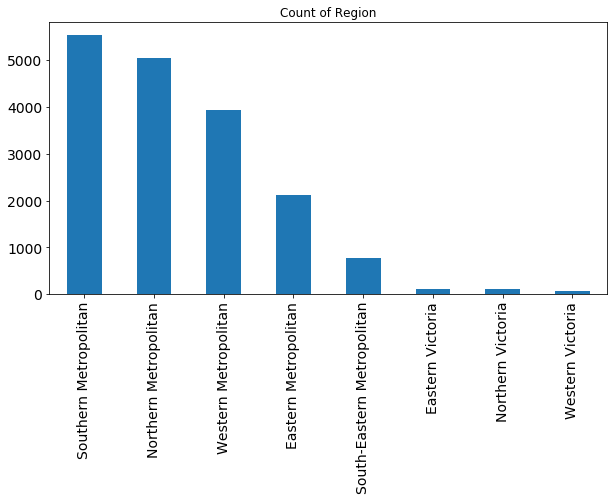

In [17]:
# Count of Region
data1['Regionname'].value_counts().head(30).plot.bar(figsize = (10,5),fontsize = 14,title = "Count of Region")

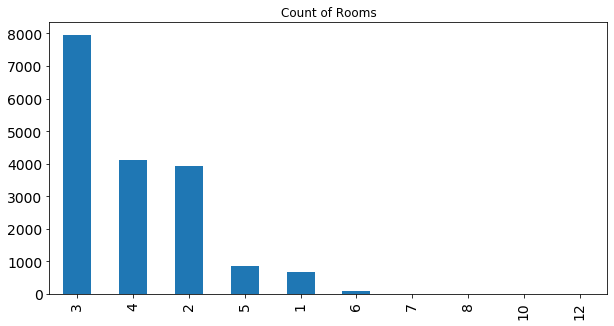

In [18]:
# Count of Rooms
#data['Rooms'].value_counts().head(20).plot.bar()
data1['Rooms'].value_counts().head(30).plot.bar(figsize = (10,5),fontsize = 14,title = "Count of Rooms")

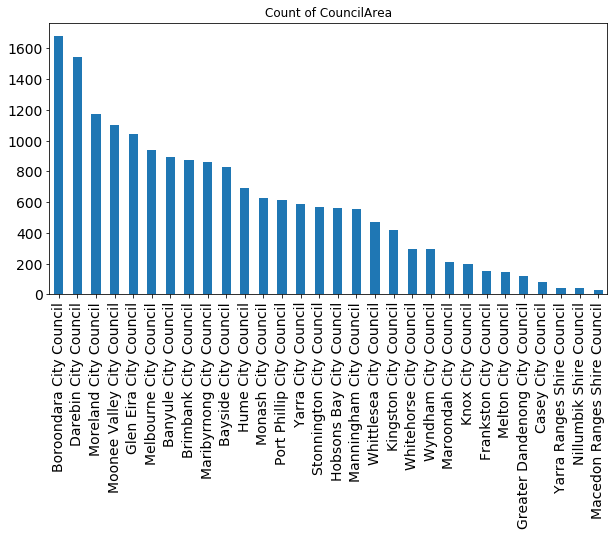

In [19]:
# Count of CouncilArea
data1['CouncilArea'].value_counts().head(30).plot.bar(figsize = (10,5),fontsize = 14,title = "Count of CouncilArea")

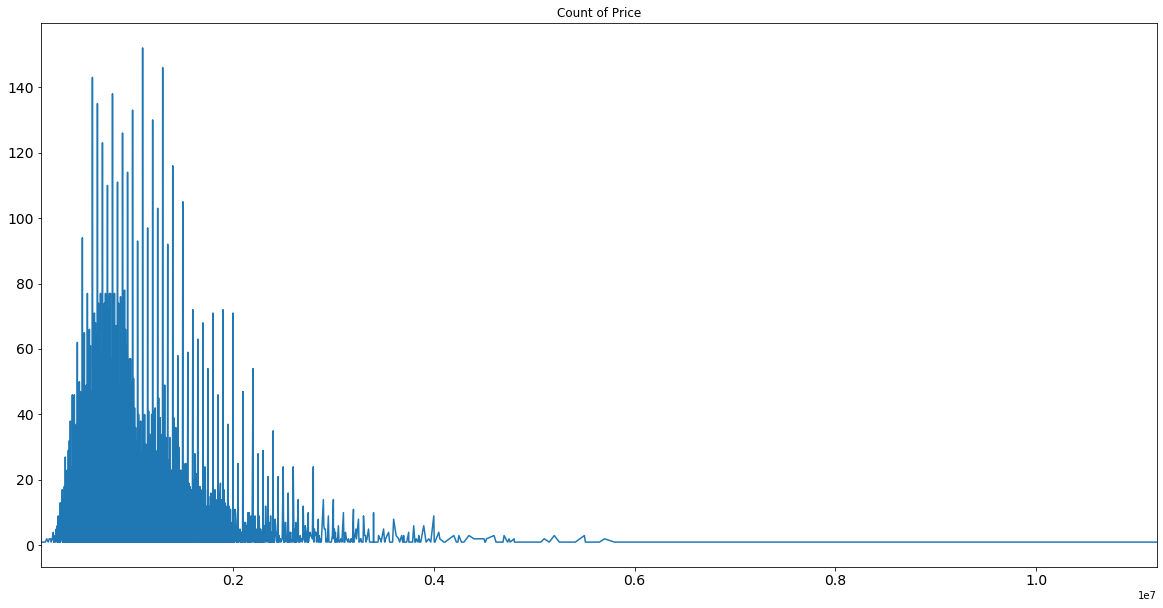

In [20]:
#Plot Price
data1['Price'].value_counts().sort_index().plot.line(figsize = (20,10),fontsize = 14,title = "Count of Price")
#data['Price'].value_counts().sort_index().plot.line()

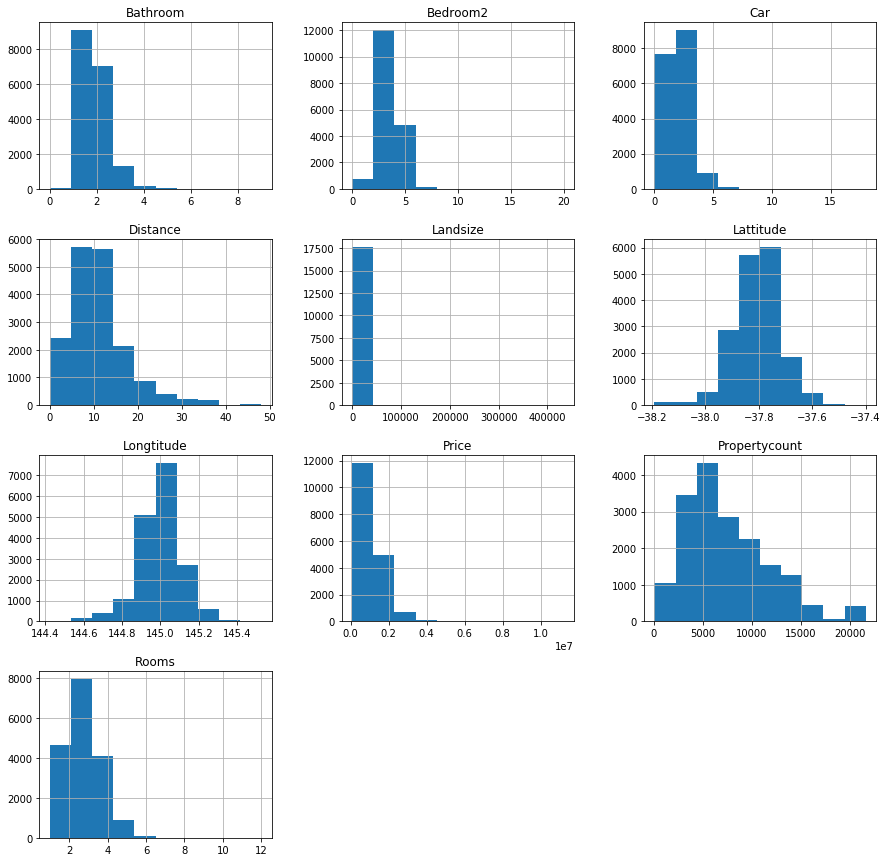

In [21]:
data1.hist(figsize=(15,15))
plt.show()

#### Correlation metrix

Text(0.5, 1, 'Variable Correlation')

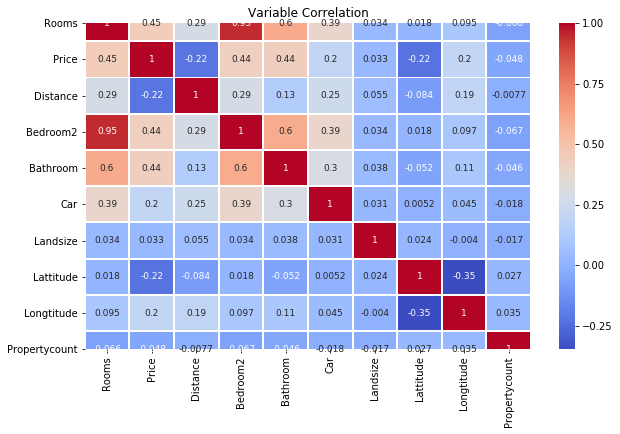

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Corelation score between "Bedroom2" and "Rooms" is 0.95. So I will remove Bedroom2

## 3.Apply the model for prediction with holdout and cross validation<a name="question2"></a>

#### Normalize data

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# create scaler
scaler = MinMaxScaler()

In [25]:
features = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
            'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
x = data1.loc[:, features].values
# fit and transform in one step
datanom = scaler.fit_transform(x)
datanom

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.09090909, 0.12550607, 0.05197505, ..., 0.49411482, 0.52115985,
        0.18250104],
       [0.09090909, 0.08547009, 0.05197505, ..., 0.48362138, 0.51662495,
        0.18250104],
       [0.18181818, 0.12415655, 0.05197505, ..., 0.4818514 , 0.51753193,
        0.18250104],
       ...,
       [0.09090909, 0.07224471, 0.13097713, ..., 0.47400028, 0.42126506,
        0.29953169],
       [0.09090909, 0.05578048, 0.13097713, ..., 0.46470789, 0.41246735,
        0.29953169],
       [0.09090909, 0.08412056, 0.13097713, ..., 0.47072582, 0.4260267 ,
        0.29953169]])

In [26]:
A=['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
   'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
B= [x for x in range(17679)]
C=datanom

datascaled_nom=pd.DataFrame(C, columns=A)
datascaled_nom.index=B
datascaled_nom.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,0.090909,0.125506,0.051975,0.068577,0.10,0.111111,0.055556,0.000466,0.494115,0.521160,0.182501
1,0.090909,0.085470,0.051975,0.068577,0.10,0.111111,0.000000,0.000360,0.483621,0.516625,0.182501
2,0.181818,0.124157,0.051975,0.068577,0.15,0.222222,0.000000,0.000309,0.481851,0.517532,0.182501
3,0.181818,0.068826,0.051975,0.068577,0.15,0.222222,0.055556,0.000217,0.497528,0.519799,0.182501
4,0.272727,0.136302,0.051975,0.068577,0.15,0.111111,0.111111,0.000277,0.484506,0.517260,0.182501


In [27]:
datascaled_nom.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,17679.0,0.186714,0.085854,0.0,0.090909,0.181818,0.272727,1.0
Price,17679.0,0.090866,0.059018,0.0,0.051732,0.074449,0.113360,1.0
Distance,17679.0,0.231873,0.138126,0.0,0.135135,0.216216,0.288981,1.0
Postcode,17679.0,0.114567,0.112028,0.0,0.047083,0.087001,0.153531,1.0
Bedroom2,17679.0,0.151827,0.047844,0.0,0.100000,0.150000,0.200000,1.0
Bathroom,17679.0,0.176047,0.078304,0.0,0.111111,0.111111,0.222222,1.0
Car,17679.0,0.094374,0.055501,0.0,0.055556,0.111111,0.111111,1.0
Landsize,17679.0,0.001374,0.008744,0.0,0.000514,0.001194,0.001533,1.0
Lattitude,17679.0,0.485385,0.112933,0.0,0.418688,0.493862,0.557328,1.0
Longtitude,17679.0,0.519281,0.106049,0.0,0.454851,0.525060,0.583651,1.0


#### Build linear regression model

In [28]:
# Identify numeric features
data1.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

In [29]:
# Split
# Create features variable 
X =datascaled_nom[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize','Lattitude', 'Longtitude', 'Propertycount',]]

# Create target variable
y = datascaled_nom['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [30]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# Make predictions using the testing set
y_pred = regressor.predict(X_test)

In [32]:
# Score It
from sklearn import metrics
print('Coefficients: \n', regressor.coef_)
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, y_pred))

Coefficients: 
 [ 0.28418812 -0.1879727   0.1473091   0.08372026  0.64082037 -0.1067403
  0.08635686 -0.00383745]
MAE: 0.02932900153721696
MSE: 0.0019071741501246148
RMSE: 0.04367120504548294
Variance score: 0.44


## 4. Using PCA, apply the model with holdout and cross validation<a name="question3"></a>

In [33]:
dataNoPrice = datascaled_nom.drop(["Price","Postcode", "Bedroom2"], axis=1)
dataNoPrice

,Rooms,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,0.090909,0.051975,0.111111,0.055556,0.000466,0.494115,0.521160,0.182501
1,0.090909,0.051975,0.111111,0.000000,0.000360,0.483621,0.516625,0.182501
2,0.181818,0.051975,0.222222,0.000000,0.000309,0.481851,0.517532,0.182501
3,0.181818,0.051975,0.222222,0.055556,0.000217,0.497528,0.519799,0.182501
4,0.272727,0.051975,0.111111,0.111111,0.000277,0.484506,0.517260,0.182501
...,...,...,...,...,...,...,...,...
17674,0.181818,0.530146,0.222222,0.111111,0.000933,0.733429,0.553385,0.132471
17675,0.272727,0.130977,0.111111,0.166667,0.001369,0.480296,0.418009,0.299532
17676,0.090909,0.130977,0.222222,0.055556,0.000226,0.474000,0.421265,0.299532
17677,0.090909,0.130977,0.111111,0.111111,0.000508,0.464708,0.412467,0.299532


In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents=pca.fit_transform(dataNoPrice)
#principalDf=pd.DataFrame(data=principalComponents, columns=['principal component 1', 
#'principal component 2','principal component 3','principal component 4','principal component 5',
#'principal component 6','principal component 7'])
principalDf=pd.DataFrame(data=principalComponents, columns=['principal component 1',
                                                            'principal component 2','principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-0.151376,-0.197086,-0.087304
1,-0.151195,-0.202820,-0.097769
2,-0.157538,-0.158340,-0.075807
3,-0.157659,-0.154782,-0.060301
4,-0.159087,-0.140777,-0.054844
...,...,...,...
17674,-0.210670,0.196472,0.281257
17675,-0.045978,-0.098794,0.026922
17676,-0.040958,-0.138443,-0.014739
17677,-0.038944,-0.151728,-0.019787


In [35]:
# create scaler
scaler_PCA = MinMaxScaler()
features_PCA = ['principal component 1', 'principal component 2','principal component 3']
x_PCA = principalDf.loc[:, features_PCA].values
# fit and transform in one step
datanom_PCA = scaler_PCA.fit_transform(x_PCA)
datanom_PCA

array([[0.19977606, 0.04643587, 0.15922981],
       [0.19995263, 0.04161694, 0.14994423],
       [0.19375807, 0.07899927, 0.16943187],
       ...,
       [0.3076169 , 0.09572147, 0.22362001],
       [0.3095838 , 0.08455669, 0.21914115],
       [0.31087609, 0.07557189, 0.20854901]])

In [36]:
A_PCA=['principal component 1','principal component 2','principal component 3']
B_PCA= [t for t in range(17679)]
C_PCA= datanom_PCA

datascaled_nom_PCA = pd.DataFrame(C_PCA, columns=A_PCA)
datascaled_nom_PCA.index=B_PCA
datascaled_nom_PCA.head()

,principal component 1,principal component 2,principal component 3
0,0.199776,0.046436,0.159230
1,0.199953,0.041617,0.149944
2,0.193758,0.078999,0.169432
3,0.193640,0.081990,0.183191
4,0.192245,0.093760,0.188033


In [37]:
element_ratio = pca.explained_variance_ratio_
element_ratio

array([0.41136454, 0.2209203 , 0.14697362])

In [38]:
sum(element_ratio)

0.7792584684168443

In [39]:
# Split
# Create features variable 
#X_PCA =principalDf[['principal component 1', 
#'principal component 2','principal component 3','principal component 4']]

X_PCA =datascaled_nom_PCA[['principal component 1', 
'principal component 2','principal component 3']]

# Create target variable
y_PCA = datascaled_nom['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y_PCA, test_size = .20, random_state= 0)

In [40]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor_PCA = LinearRegression()

# Fit model to training data
regressor_PCA.fit(X_train_PCA,y_train_PCA)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
# Predicting test set results
y_pred_PCA = regressor_PCA.predict(X_test_PCA)

In [42]:
# Score It
from sklearn import metrics
print('Coefficients: \n', regressor_PCA.coef_)
print('MAE:',metrics.mean_absolute_error(y_test_PCA,y_pred_PCA))
print('MSE:',metrics.mean_squared_error(y_test_PCA,y_pred_PCA))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_PCA,y_pred_PCA)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test_PCA, y_pred_PCA))

Coefficients: 
 [-0.01806555  0.01901684 -0.13778584]
MAE: 0.03905682715007621
MSE: 0.0031709414084812896
RMSE: 0.0563111126553302
Variance score: 0.07


- Using PCA does not reduce the model's predicted errors.

## 5. Visualize the residue and homoscedasticity<a name="question4"></a>

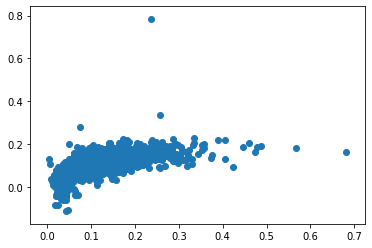

In [43]:
# Actual and predictions
plt.scatter(y_test, y_pred)

- There are some unusual points.
- From 0.2, the prediction model is incorrect. So no need to check homoscedasticity.

## 6. Tune the model if necessary<a name="question5"></a>

I use GridSearchCV for tuning

In [44]:
from sklearn.model_selection import GridSearchCV
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X,y,random_state = 1)
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train_grid, y_train_grid)
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

- The parameters that are fine-tuned by GridSearchCV are not different from the default parameters.

## 7. Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, etc.)<a name="question6"></a>

- In "3.Apply the model for prediction with holdout and cross validation".


    - RMSE is 0.04367120504548294 greater than 50% of the mean of price (also Variance score is 0.44 much smaller than 1) so model is overfitting.
    
    - Coefficients: Room (0.284) and Landsize(0.641) have the most positive effects on price, Distance(-0.188) have the most negative effect on prices.
    
    
- In "4. Using PCA, apply the model with holdout and cross validation". RMSE is 0.0563111126553302 (also Variance score is 0.07) so applying PCA is not better.

## 8. Include conclusions for summary<a name="question7"></a>

- The data used for building model is only about 50% of the original data.
- The model does not have an accurate prediction when the price is from 0.2 (scaled).
- Using PCA does not reduce the model's predicted errors.
- The parameters that are fine-tuned by GridSearchCV are not different from the default parameters.